In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
versions = np.array(["52", "37", "36", "23", "RABBE"])

Temp_state_point = np.array([243.15, 258.15, 273.15, 298.15])
Temp_statepoint_id = np.array(["243", "258", "273", "298"])

file_ID = np.array(["1", "2", "3"])


In [3]:
Self_Diff_array = np.zeros((len(file_ID), len(versions), len(Temp_statepoint_id)))

In [4]:
for i in range(len(file_ID)):
    for j in range(len(versions)):
        for k in range(len(Temp_statepoint_id)):
            T = Temp_statepoint_id
            Ver = versions
            openfile = open(f"R32_v{Ver[j]}_2000mol_nptBridgman_{T[k]}K_{T[k]}P_realstate_Diff_RDF_{file_ID[i]}.json")
            dictionary = json.load(openfile)
            dict_items = dictionary.items()
            list_dictionary = list(dict_items)
            Diffusivity_data = (((list_dictionary[0][1])))
            Diffusivity_data = list(Diffusivity_data.items())
            Diffusivity_sim = Diffusivity_data[0][1]
            Self_Diff_array[i,j,k] = Diffusivity_sim


            

RDF_T = 273
RDF_test_len = 500
RDF_array = np.zeros((len(versions), RDF_test_len))
Distance_array = np.zeros((len(versions), RDF_test_len))

for l in range(len(versions)):
        openfile = open(f"R32_v{versions[l]}_2000mol_nptBridgman_{RDF_T}K_{RDF_T}P_realstate_Diff_RDF_1.json")
        dictionary = json.load(openfile)
        dict_items = dictionary.items()
        list_dictionary = list(dict_items)
        RDF_data = (((list_dictionary[2][1])))
        RDF_data = list(RDF_data.items())
        Radial_dist = RDF_data[0][1]
        distance = RDF_data[1][1]
        RDF_data_len = len(Radial_dist)
        RDF_array[l,0:RDF_data_len] = Radial_dist
        Distance_array[l,0:RDF_data_len] = distance



In [5]:
Distance_array_1 = [k for k in Distance_array[0,:] if k != 0]
RDF_array_1 = np.concatenate([RDF_array[0 , 0:100] , [k for k in RDF_array[0, 100:] if k != 0]])


Distance_array_2 = [k for k in Distance_array[1,:] if k != 0]
RDF_array_2 = np.concatenate([RDF_array[1 , 0:100] , [k for k in RDF_array[1, 100:] if k != 0]])

Distance_array_3 = [k for k in Distance_array[2,:] if k != 0]
RDF_array_3 = np.concatenate([RDF_array[2 , 0:100] , [k for k in RDF_array[2, 100:] if k != 0]])

Distance_array_4 = [k for k in Distance_array[3,:] if k != 0]
RDF_array_4 = np.concatenate([RDF_array[3 , 0:100] , [k for k in RDF_array[3, 100:] if k != 0]])

Distance_array_5 = [k for k in Distance_array[4,:] if k != 0]
RDF_array_5 = np.concatenate([RDF_array[4 , 0:100] , [k for k in RDF_array[4, 100:] if k != 0]])


In [6]:
Distance_data_all = np.array([ Distance_array_1 , Distance_array_2, Distance_array_3, \
                    Distance_array_4, Distance_array_5], dtype=object)

RDF_data_all = np.array([ RDF_array_1 , RDF_array_2, RDF_array_3, \
                    RDF_array_4, RDF_array_5], dtype=object)

In [7]:
Diff_MD = np.mean(Self_Diff_array, axis=0)
Diff_MD_error = np.std(Self_Diff_array, axis=0)

In [8]:
kb_si = 1.380649e-23
corr_factor = 2.837298

viscosity = np.loadtxt("R32_viscosity.txt")
viscosity_error = np.loadtxt("R32_viscosity_error.txt")
length = np.loadtxt("R32_Lengths.txt")
length_error = np.loadtxt("R32_Lengths_error.txt")



correction_term = ((kb_si*Temp_state_point*corr_factor)/(6*(22/7)*viscosity*length))
Diff_corrected = Diff_MD + correction_term

Diff_corrected_error = Diff_MD_error + correction_term*(length_error/length + viscosity_error/viscosity)

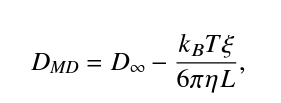

In [9]:
print(Diff_MD)

print(Diff_corrected)

[[5.61758618e-09 6.87874484e-09 8.32261971e-09 1.14259665e-08]
 [5.29855874e-09 6.71292100e-09 8.33603522e-09 1.17001212e-08]
 [5.34101369e-09 6.73845091e-09 7.83453475e-09 1.14595514e-08]
 [5.64975103e-09 6.87058615e-09 8.50747884e-09 1.18517556e-08]
 [5.52082318e-09 6.78975909e-09 8.57319292e-09 1.21162589e-08]]
[[6.05993509e-09 7.40090225e-09 8.99853512e-09 1.23847559e-08]
 [5.73697296e-09 7.24736475e-09 9.00907821e-09 1.26249601e-08]
 [5.76065592e-09 7.28864128e-09 8.48934735e-09 1.23853193e-08]
 [6.10817026e-09 7.42917731e-09 9.18861554e-09 1.27816621e-08]
 [5.98682339e-09 7.35352195e-09 9.28072295e-09 1.31286974e-08]]


In [10]:
print(Diff_corrected_error)

[[1.08555518e-10 1.60826802e-10 3.30509410e-10 3.62757024e-10]
 [2.45591195e-10 1.67857913e-10 1.49176601e-10 1.34910022e-10]
 [1.05812266e-10 2.03730589e-10 1.73969528e-10 1.94356480e-10]
 [8.92399328e-11 1.16285026e-10 2.00182983e-10 2.40925613e-10]
 [8.89142217e-11 2.36399527e-10 3.02149803e-10 4.83392563e-10]]


In [11]:
Fouad_Alasiri_Diff = np.array([6.551, 7.216, 9.070, 9.397, 11.049, 12.459, 15.432])

Temp_Fouad_Alasiri = np.array([243, 253, 263, 273, 283, 293, 303])

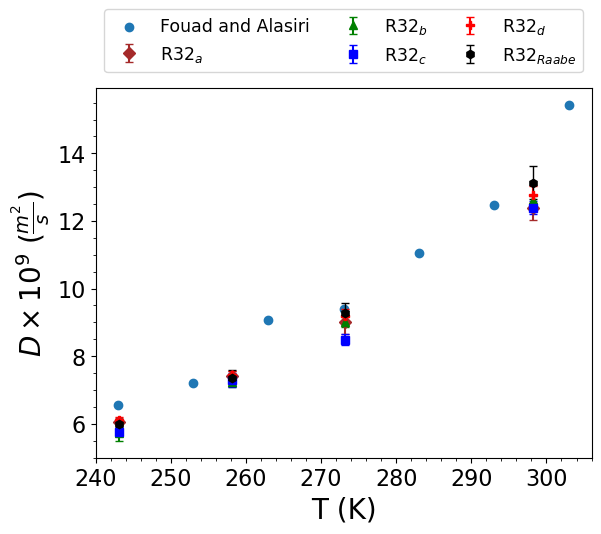

In [12]:
fig, ax = plt.subplots()

ax.errorbar(Temp_state_point, Diff_corrected[0,:]*1e9, yerr = Diff_corrected_error[0,:]*1e9, fmt='D',ecolor = 'brown',color='brown', label = 'R32$_{a}$', capsize=3)
ax.errorbar(Temp_state_point, Diff_corrected[1,:]*1e9, yerr = Diff_corrected_error[1,:]*1e9, fmt='^',ecolor = 'green',color='green', label = 'R32$_{b}$', capsize=3)
ax.errorbar(Temp_state_point, Diff_corrected[2,:]*1e9, yerr = Diff_corrected_error[2,:]*1e9, fmt='s',ecolor = 'blue',color='blue', label = 'R32$_{c}$', capsize=3)
ax.errorbar(Temp_state_point, Diff_corrected[3,:]*1e9, yerr = Diff_corrected_error[3,:]*1e9, fmt='P',ecolor = 'red',color='red', label = 'R32$_{d}$', capsize=3)
ax.errorbar(Temp_state_point, Diff_corrected[4,:]*1e9, yerr = Diff_corrected_error[4,:]*1e9, fmt='h',ecolor = 'black',color='black', elinewidth=1, label = 'R32$_{Raabe}$', capsize=3)
ax.scatter(Temp_Fouad_Alasiri, Fouad_Alasiri_Diff, label = 'Fouad and Alasiri')

ax.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", mode="expand", ncol=3, fontsize=12.5)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
ax.minorticks_on()
plt.xlabel('T (K)', fontsize=20)
plt.ylabel(r'$ D \times 10^9 $' ' ' r'$(\frac{m^2}{s})$', fontsize=20)

plt.savefig("R32_Diffusivity", dpi=1000, bbox_inches='tight')

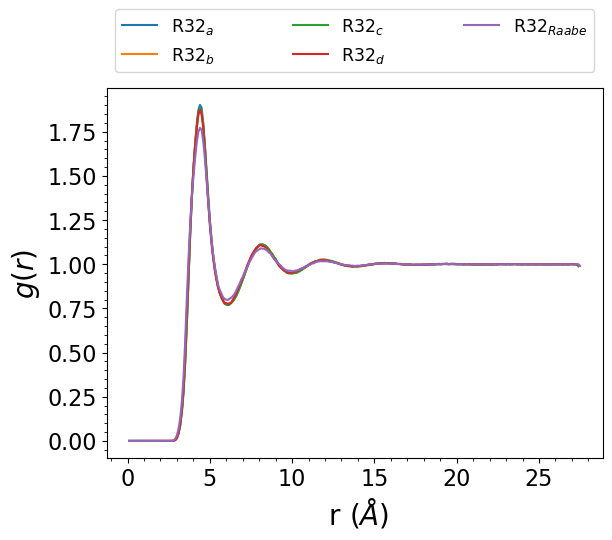

In [13]:
fig, ax = plt.subplots()

ax.plot(list(Distance_data_all)[0], list(RDF_data_all)[0], label = 'R32$_{a}$')
ax.plot(list(Distance_data_all)[1], list(RDF_data_all)[1], label = 'R32$_{b}$')
ax.plot(list(Distance_data_all)[2], list(RDF_data_all)[2], label = 'R32$_{c}$')
ax.plot(list(Distance_data_all)[3], list(RDF_data_all)[3], label = 'R32$_{d}$')
ax.plot(list(Distance_data_all)[4], list(RDF_data_all)[4], label = 'R32$_{Raabe}$')

ax.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", mode="expand", ncol=3, fontsize=12.5)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
ax.minorticks_on()
plt.xlabel(r' r $(\AA) $', fontsize=20)
plt.ylabel(r'$ g(r) $', fontsize=20)

plt.savefig("R32_RDF", dpi=1000, bbox_inches='tight')

In [16]:
def Create_Latex_Results_Table(sim, sim_error, table_cols, decimal_places, filename):
   
    

    sim_exp = sim.T

    sim_error_exp_error = sim_error.T

    
    result_round_array = np.around(sim_exp, decimal_places)
    formatted_array = np.array([["{:.{}f}".format(num, decimal_places) for num in row] for row in result_round_array])      
    error_round_array = np.around(sim_error_exp_error, decimal_places)
    formatted_array_error = np.array([["{:.{}f}".format(num, decimal_places) for num in row] for row in error_round_array])
    
    
    array1 = formatted_array
    array2 = formatted_array_error

    result_array = []

    # Loop through the arrays and combine corresponding elements with +/-
    for i in range(len(array1)):
        row_result = []
        for j in range(len(array1[i])):
            row_result.append(f" &  {array1[i][j]}  $\pm$ {array2[i][j]}")
        result_array.append(row_result)
        
    T_reshape = np.reshape(Temp_state_point, (len(Temp_state_point), 1))
    result_array_updated = (np.concatenate((T_reshape , result_array), axis=1))


    # Save the result array to a file
    with open(filename, "w") as file:
        for row in result_array_updated:
            file.write("\t".join(row).replace('$\\pm$', '$\pm$') + r'\\' + "\n")
    
    file.close()
    
    return file


Diffusivity_table = Create_Latex_Results_Table(Diff_corrected*1e9, Diff_corrected_error*1e9, 6, 2,\
                                               "R32_Diff_Data_Latex.txt")